In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers,models
import matplotlib.pyplot as plt

In [2]:
mask=os.listdir("./data/with_mask")
notmask=os.listdir("./data/without_mask")
len(mask),len(notmask)

(3725, 3828)

In [3]:
b=32
s=256
dataset=keras.utils.image_dataset_from_directory(
    "data",  
    shuffle=True,
    image_size=(s, s),
    batch_size=b,
)

Found 7553 files belonging to 2 classes.


In [4]:
len(dataset.class_names)
# 0=with mask
# 1=withput mask
dataset.class_names
# labels=["with mask","with"]

['with_mask', 'without_mask']

In [5]:
labels=['with_mask', 'without_mask']

In [9]:
l=len(dataset)
l

237

In [10]:
data_augmentation =Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


resize_and_rescale=Sequential([
  layers.Resizing(s, s),
  layers.Rescaling(1./255)
])

In [11]:

def get(d,l):
    ts=int(0.8*l)
    vs=int(0.1*l)
    tes=int(0.1*l)
    tds=d.take(ts)
    vds=d.skip(ts).take(vs)
    teds=d.skip(ts).skip(vs)# as skip both tabhi toh bacha hua test
    return tds,vds,teds
   

In [12]:
train,val,test=get(dataset,l)
len(train),len(val),len(test)

(189, 23, 25)

In [13]:
type(train)

tensorflow.python.data.ops.take_op._TakeDataset

In [12]:
'''data preprocessing part'''
tds=train.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
vds=val.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
teds=test.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
input_shape=(b,s,s,3)
n_classes=2
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(n_classes,activation='sigmoid'),
])
model.build(input_shape=input_shape)

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [19]:
EPOCHS=10
model.fit(train,epochs=EPOCHS,batch_size=b, verbose=1,validation_data=val)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.8827 - loss: 0.2947 - val_accuracy: 0.8696 - val_loss: 0.3420
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.8827 - loss: 0.2901 - val_accuracy: 0.9035 - val_loss: 0.2506
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9026 - loss: 0.2485 - val_accuracy: 0.8967 - val_loss: 0.2869
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9027 - loss: 0.2472 - val_accuracy: 0.9117 - val_loss: 0.2428
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9000 - loss: 0.2486 - val_accuracy: 0.9022 - val_loss: 0.2499
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9084 - loss: 0.2368 - val_accuracy: 0.9130 - val_loss: 0.2354
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9059 - loss: 0.2427 - val_accuracy: 0.9144 - val_loss: 0.2388
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9138 - loss: 0.2197 - val_accu

In [17]:
model.evaluate(test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 519ms/step - accuracy: 0.5176 - loss: 0.6948


[0.6943425536155701, 0.5240572094917297]

In [18]:
p=model.predict(val)
p

23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 544ms/step


array([[0.5163753 , 0.52894247],
       [0.5344098 , 0.5376574 ],
       [0.53601575, 0.54052794],
       ...,
       [0.5442686 , 0.5379075 ],
       [0.5289715 , 0.5328134 ],
       [0.521314  , 0.53274137]], dtype=float32)

In [19]:
pred=model.predict(test)
pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 506ms/step


array([[0.52725494, 0.53414893],
       [0.5266504 , 0.5359353 ],
       [0.52646583, 0.5237755 ],
       ...,
       [0.53575635, 0.5455693 ],
       [0.52140754, 0.5352662 ],
       [0.5250596 , 0.5226315 ]], dtype=float32)

In [22]:
type(pred)

numpy.ndarray

In [21]:
yp=[1 if i>0.5 else 0 for i in pred]
ytrue=list([j.numpy() for i,j in test][0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[0.45388046 0.90611917]
<class 'numpy.ndarray'>
without_mask


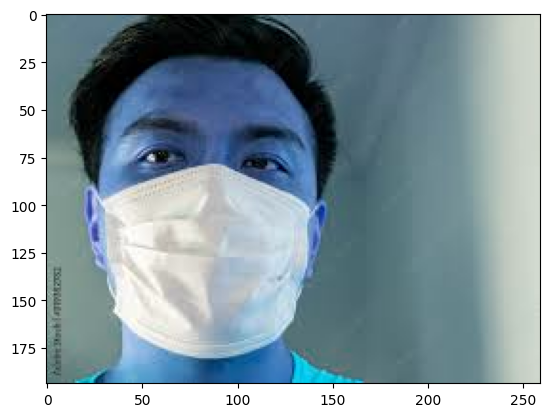

In [22]:
a="./data/download.jpg"
i=cv2.imread(a)
plt.imshow(i)
# cv2.imshow(a, i[0])
i=cv2.resize(i,(s,s))
i=i/255
i= np.expand_dims(i, axis=0)
p=model.predict(i)[0]
print(p) 
print(type(p))
c=np.argmax(p)
print(labels[c])
# ./data/download.jpg

In [33]:
p=model.predict(test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 503ms/step


In [28]:
model.save('maskmodel.keras')


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
try:
    model = load_model('maskmodel.keras')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Load the Haar Cascades for face and mouth detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
mouth_cascade_path = 'haarcascade_mcs_mouth.xml' # Path to your mouth cascade file

mouth_cascade = cv2.CascadeClassifier(mouth_cascade_path)
if mouth_cascade.empty():
    print("Error: Could not load mouth cascade.")
    exit()

# Access the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        # Detect mouth within the face region
        mouth_rects = mouth_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=20)

        if len(mouth_rects) == 0:
            status = "with_mask"
            color = (0, 255, 0)  # Green
        else:
            status = "without_mask"
            color = (0, 0, 255)  # Red

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, status, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        # Optionally draw rectangles around detected mouths
        for (mx, my, mw, mh) in mouth_rects:
            cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (255, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Webcam', frame)

    # Press 'q' to exit the webcam view
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Model loaded successfully.


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
try:
    model = load_model('maskmodel.keras')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Access the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    for (x, y, w, h) in faces:
        roi_color = frame[y:y+h, x:x+w]
        face_roi = roi_color

        # Preprocess the face ROI
        try:
            finalimage = cv2.resize(face_roi, (256, 256))
            finalimage = np.expand_dims(finalimage, axis=0)
            finalimage = finalimage / 255.0
            p = model.predict(finalimage)
            print(p)
            
            if np.argmax(p) == 0:
                status = "with_mask"
               
                cv2.putText(frame, status, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2)
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
            elif np.argmax(p) == 1:
                status = "without_mask"
               
                cv2.putText(frame, status, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2)
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        except Exception as e:
            print(f"Error during prediction or processing: {e}")

    # Display the resulting frame
    cv2.imshow('Webcam', frame)

    # Press 'q' to exit the webcam view
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
[[0.4099941 0.9201824]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[0.40694928 0.92192566]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.39812225 0.9251008 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.40334472 0.9234195 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.40762874 0.9218777 ]]


In [32]:
# from tensorflow.keras.models import load_model
# model = load_model('maskmodel.keras')

# # Function to preprocess the frame for your model
# def preprocess_frame(frame):
#     # Resize the frame to the input size of your model
#     input_size = (256, 256)  # Change this based on your model's input size
#     frame = cv2.resize(frame, input_size)
#     frame = frame.astype('float32') / 255.0  # Normalize if required
#     frame = np.expand_dims(frame, axis=0)  # Add batch dimension
#     return frame

# # Access the webcam
# cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     print("Error: Could not open webcam.")
#     exit()

# while True:
#     # Capture frame-by-frame
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Preprocess the frame
#     processed_frame = preprocess_frame(frame)

#     # Make prediction
#     predictions = model.predict(processed_frame)
#     # For example, if it's a classification model
#     predicted_class = np.argmax(predictions[0])
#     classs=labels[predicted_class ]
    

#     # Display the resulting frame
#     cv2.putText(frame, f'Prediction: {classs}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#     cv2.imshow('Webcam', frame)

#     # Press 'q' to exit the webcam view
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━